https://colab.research.google.com/drive/1z0fQFkHSrACIvfEQqTR9RqByS1FCHQ6I

In [0]:
!wget https://www.dropbox.com/s/qpw1wnmho8v0gi4/atis.zip

--2019-10-02 16:10:22--  https://www.dropbox.com/s/qpw1wnmho8v0gi4/atis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qpw1wnmho8v0gi4/atis.zip [following]
--2019-10-02 16:10:22--  https://www.dropbox.com/s/raw/qpw1wnmho8v0gi4/atis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc588480bc46d693a7180801f8fe.dl.dropboxusercontent.com/cd/0/inline/ApqTtVKs8gdVyvAyGXs_UpSfCZzSVBxH4ySqInR5rtPllqhGWALW0iOM6U6nU6o48VIJ3AP4Sinzy7ngI8wpr7yl_-Q_-oF9t_BAObmSSmpPEQ/file# [following]
--2019-10-02 16:10:23--  https://uc588480bc46d693a7180801f8fe.dl.dropboxusercontent.com/cd/0/inline/ApqTtVKs8gdVyvAyGXs_UpSfCZzSVBxH4ySqInR5rtPllqhGWALW0iOM6U6nU6o48VIJ3AP4Sinzy7ngI8wpr7yl_-Q_-oF9t_BAObmSSmpPEQ/file
Resolving uc588480bc46d693a7180

In [0]:
!ls

atis.zip  sample_data


In [0]:
!unzip atis.zip

Archive:  atis.zip
  inflating: atis.dict.intent.csv    
  inflating: atis.dict.slots.csv     
  inflating: atis.dict.vocab.csv     
  inflating: atis.test.intent.csv    
  inflating: atis.test.pkl           
  inflating: atis.test.query.csv     
  inflating: atis.test.slots.csv     
  inflating: atis.train.intent.csv   
  inflating: atis.train.pkl          
  inflating: atis.train.query.csv    
  inflating: atis.train.slots.csv    


In [0]:
!ls

atis.dict.intent.csv  atis.test.pkl	     atis.train.pkl	   sample_data
atis.dict.slots.csv   atis.test.query.csv    atis.train.query.csv
atis.dict.vocab.csv   atis.test.slots.csv    atis.train.slots.csv
atis.test.intent.csv  atis.train.intent.csv  atis.zip


In [0]:
import numpy as np 
import pandas as pd


In [0]:
import pickle

DATA_DIR="/content"

def load_ds(fname='atis.train.pkl'):
    with open(fname, 'rb') as stream:
        ds,dicts = pickle.load(stream)
    print('Done  loading: ', fname)
    print('      samples: {:4d}'.format(len(ds['query'])))
    print('   vocab_size: {:4d}'.format(len(dicts['token_ids'])))
    print('   slot count: {:4d}'.format(len(dicts['slot_ids'])))
    print(' intent count: {:4d}'.format(len(dicts['intent_ids'])))
    return ds,dicts

In [0]:
import os
train_ds, dicts = load_ds(os.path.join(DATA_DIR,'atis.train.pkl'))
test_ds, dicts  = load_ds(os.path.join(DATA_DIR,'atis.test.pkl'))

Done  loading:  /content/atis.train.pkl
      samples: 4978
   vocab_size:  943
   slot count:  129
 intent count:   26
Done  loading:  /content/atis.test.pkl
      samples:  893
   vocab_size:  943
   slot count:  129
 intent count:   26


In [0]:
t2i, s2i, in2i = map(dicts.get, ['token_ids', 'slot_ids','intent_ids'])
i2t, i2s, i2in = map(lambda d: {d[k]:k for k in d.keys()}, [t2i,s2i,in2i])
query, slots, intent =  map(train_ds.get, ['query', 'slot_labels', 'intent_labels'])

for i in range(10):
    print('{:4d}:{:>15}: {}'.format(i, i2in[intent[i][0]],
                                    ' '.join(map(i2t.get, query[i]))))
    print('intent:', i2in[intent[i][0]])
    for j in range(len(query[i])):
        print('{:>33} {:>40}'.format(i2t[query[i][j]],
                                     i2s[slots[i][j]]))
    print('*'*74)

   0:         flight: BOS i want to fly from boston at 838 am and arrive in denver at 1110 in the morning EOS
intent: flight
                              BOS                                        O
                                i                                        O
                             want                                        O
                               to                                        O
                              fly                                        O
                             from                                        O
                           boston                      B-fromloc.city_name
                               at                                        O
                              838                       B-depart_time.time
                               am                       I-depart_time.time
                              and                                        O
                           arrive                 

In [0]:
t2i

In [0]:
in2i

{'abbreviation': 0,
 'aircraft': 1,
 'aircraft+flight+flight_no': 2,
 'airfare': 3,
 'airfare+flight': 4,
 'airfare+flight_time': 5,
 'airline': 6,
 'airline+flight_no': 7,
 'airport': 8,
 'capacity': 9,
 'cheapest': 10,
 'city': 11,
 'day_name': 12,
 'distance': 13,
 'flight': 14,
 'flight+airfare': 15,
 'flight+airline': 16,
 'flight_no': 17,
 'flight_no+airline': 18,
 'flight_time': 19,
 'ground_fare': 20,
 'ground_service': 21,
 'ground_service+ground_fare': 22,
 'meal': 23,
 'quantity': 24,
 'restriction': 25}

In [0]:
query[0]

array([178, 479, 902, 851, 431, 444, 266, 240, 168, 210, 215, 236, 482,
       351, 240,  27, 482, 827, 606, 179])

In [0]:
slots[0]

array([128, 128, 128, 128, 128, 128,  48, 128,  35, 100, 128, 128, 128,
        78, 128,  14, 128, 128,  12, 128])

In [0]:
intent[0]

array([14])

In [0]:
i2t2 = []
i2s2 = []
c=[]
for i in range(4978):
  a = []
  b = []
  c.append(i2in[intent[i][0]])
  for j in range(len(query[i])):
    a.append(i2t[query[i][j]])
    b.append(i2s[slots[i][j]])
  i2t2.append(a)
  i2s2.append(b)

In [0]:
i2t2 = np.array(i2t2)
i2s2 = np.array(i2s2)
i2in2 = np.array(c)
print(i2t2.shape, i2s2.shape,i2in2.shape)

(4978,) (4978,) (4978,)


In [0]:
print('tokens: ',i2t2[0])
print('slots: ',i2s2[0])
print('intent: ',i2in2[0])

tokens:  ['BOS', 'i', 'want', 'to', 'fly', 'from', 'boston', 'at', '838', 'am', 'and', 'arrive', 'in', 'denver', 'at', '1110', 'in', 'the', 'morning', 'EOS']
slots:  ['O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-depart_time.time', 'I-depart_time.time', 'O', 'O', 'O', 'B-toloc.city_name', 'O', 'B-arrive_time.time', 'O', 'O', 'B-arrive_time.period_of_day', 'O']
intent:  flight


In [0]:
final_sentences = []
final_targets = []
final_docs = []
for i in range(len(i2t2)):
  tokens = ''
  entities = ''
  intent = ''
  for j in range(len(i2t2[i])):
    tokens= tokens + i2t2[i][j] + ' '
    entities = entities + i2s2[i][j] +' '
  intent = i2in2[i]
  final_sentences.append(tokens)
  final_targets.append(entities)
  final_docs.append(intent)

In [0]:
print('query: ',final_sentences[0])
print('slots: ',final_targets[0])
print('intent: ',final_docs[0])

query:  BOS i want to fly from boston at 838 am and arrive in denver at 1110 in the morning EOS 
slots:  O O O O O O B-fromloc.city_name O B-depart_time.time I-depart_time.time O O O B-toloc.city_name O B-arrive_time.time O O B-arrive_time.period_of_day O 
intent:  flight


In [0]:
i2t2[0]

['BOS',
 'i',
 'want',
 'to',
 'fly',
 'from',
 'boston',
 'at',
 '838',
 'am',
 'and',
 'arrive',
 'in',
 'denver',
 'at',
 '1110',
 'in',
 'the',
 'morning',
 'EOS']

In [0]:
from collections import Counter
counts = Counter()
for i,sentence in enumerate(final_sentences):
    counts.update(sentence.split())

In [0]:
sentence_words = sorted(counts, key=counts.get, reverse=True)
#sentence_words[0:50]

In [0]:
chars = sentence_words
nb_chars = len(chars)
nb_chars

891

In [0]:
sentence_word_to_int = {word: i for i, word in enumerate(sentence_words, 1)}
sentence_int_to_word = {i: word for i, word in enumerate(sentence_words, 1)}

In [0]:
mapped_reviews = []
for review in final_sentences:
    mapped_reviews.append([sentence_word_to_int[word] for word in review.split()])

In [0]:
mapped_reviews[0]

[1, 14, 72, 3, 40, 4, 11, 70, 408, 88, 19, 81, 18, 15, 70, 532, 18, 6, 38, 2]

# Entity extraction

In [0]:
from collections import Counter
counts = Counter()
for i,sentence in enumerate(final_targets):
    counts.update(sentence.split())

In [0]:
target_words = sorted(counts, key=counts.get, reverse=True)
target_words[0:10]

['O',
 'B-toloc.city_name',
 'B-fromloc.city_name',
 'I-toloc.city_name',
 'B-depart_date.day_name',
 'B-airline_name',
 'I-fromloc.city_name',
 'B-depart_time.period_of_day',
 'I-airline_name',
 'B-depart_date.day_number']

In [0]:
chars = target_words
nb_chars = len(target_words)
nb_chars

123

In [0]:
target_word_to_int = {word: i for i, word in enumerate(target_words, 1)}
target_int_to_word = {i: word for i, word in enumerate(target_words, 1)}

In [0]:
mapped_targets = []
for review in final_targets:
    mapped_targets.append([target_word_to_int[word] for word in review.split()])

In [0]:
len(target_word_to_int)

123

In [0]:
from keras.preprocessing.sequence import pad_sequences
y = pad_sequences(maxlen=124, sequences=mapped_targets, padding="post", value=0)

Using TensorFlow backend.


In [0]:
from keras.utils import to_categorical
y2 = [to_categorical(i, num_classes=len(target_word_to_int)+1) for i in y]

In [0]:
y3 = np.array(y2)

In [0]:
length_sent = []
for i in range(len(mapped_reviews)):
  a = mapped_reviews[i]
  b = len(a)
  length_sent.append(b)
np.max(length_sent)

48

In [0]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=50, sequences=mapped_reviews, padding="post", value=0)
Y = pad_sequences(maxlen=50, sequences=mapped_targets, padding="post", value=0)


In [0]:
from keras.utils import to_categorical
y2 = [to_categorical(i, num_classes=124) for i in Y]

In [0]:
y3 = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y3, test_size=0.30,random_state=10)

In [0]:
print(X.shape,y3.shape)

(4978, 50) (4978, 50, 124)


In [0]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [0]:
input = Input(shape=(50,))
model = Embedding(input_dim=891, output_dim=32, input_length=50)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(124, activation="softmax"))(model)  # softmax output layer





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(input, out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 32)            28512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 200)           106400    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 124)           24924     
Total params: 159,836
Trainable params: 159,836
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
history = model.fit(X_train,y_train, batch_size=32, epochs=5, validation_data = (X_test,y_test), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3484 samples, validate on 1494 samples
Epoch 1/5
3484/3484 [==============================] - 35s 10ms/step - loss: 1.1849 - acc: 0.8304 - val_loss: 0.5040 - val_acc: 0.8987
Epoch 2/5
3484/3484 [==============================] - 29s 8ms/step - loss: 0.4703 - acc: 0.9045 - val_loss: 0.4349 - val_acc: 0.9122
Epoch 3/5
3484/3484 [==============================] - 29s 8ms/step - loss: 0.4099 - acc: 0.9140 - val_loss: 0.3671 - val_acc: 0.9182
Epoch 4/5
3484/3484 [==============================] - 29s 8ms/step - loss: 0.3144 - acc: 0.9310 - val_loss: 0.2562 - val_acc: 0.9475
Epoch 5/5
3484/3484 [==============================] - 29s 8ms/step - loss: 0.2243 - acc: 0.9520 - val_loss: 0.1943 - val_acc: 0.9569


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


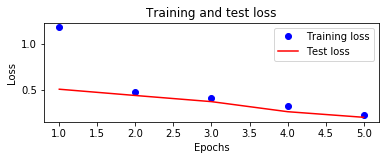

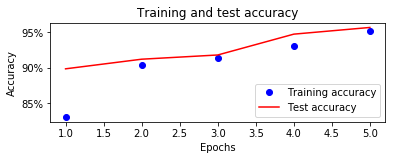

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Intent extraction

In [0]:
from collections import Counter
counts = Counter()
for i,sentence in enumerate(final_docs):
     counts.update(sentence.split())
intent_words = sorted(counts, key=counts.get, reverse=True)
chars = intent_words
nb_chars = len(intent_words)
intent_word_to_int = {word: i for i, word in enumerate(intent_words, 1)}
intent_int_to_word = {i: word for i, word in enumerate(intent_words, 1)}
mapped_docs = []
for review in final_docs:
     mapped_docs.append([intent_word_to_int[word] for word in review.split()])

In [0]:
from keras.utils import to_categorical
doc2 = [to_categorical(i[0], num_classes=23) for i in mapped_docs]
doc3 = np.array(doc2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,doc3, test_size=0.30,random_state=10)

In [0]:
input = Input(shape=(50,))
model2 = Embedding(input_dim=891, output_dim=32, input_length=50)(input)
model2 = Dropout(0.1)(model2)
model2 = Bidirectional(LSTM(units=100))(model2)
out = (Dense(23, activation="softmax"))(model2)
model2 = Model(input, out)

In [0]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
model2.fit(X_train,y_train, batch_size=32, epochs=5, validation_data = (X_test,y_test), verbose=1)

Train on 3484 samples, validate on 1494 samples
Epoch 1/5
3484/3484 [==============================] - 29s 8ms/step - loss: 1.3140 - acc: 0.7388 - val_loss: 1.0111 - val_acc: 0.7149
Epoch 2/5
3484/3484 [==============================] - 27s 8ms/step - loss: 0.7280 - acc: 0.7956 - val_loss: 0.6613 - val_acc: 0.8293
Epoch 3/5
3484/3484 [==============================] - 27s 8ms/step - loss: 0.5101 - acc: 0.8559 - val_loss: 0.5063 - val_acc: 0.8722
Epoch 4/5
3484/3484 [==============================] - 27s 8ms/step - loss: 0.3903 - acc: 0.8958 - val_loss: 0.4834 - val_acc: 0.8775
Epoch 5/5
3484/3484 [==============================] - 27s 8ms/step - loss: 0.3125 - acc: 0.9182 - val_loss: 0.3801 - val_acc: 0.9070


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


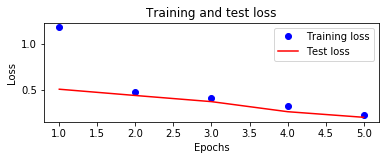

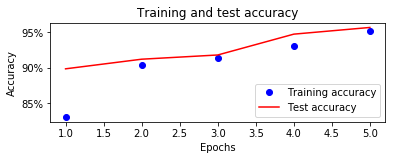

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
def preprocessing(text):
  text2 = text.split()
  a=[]
  for i in range(len(text2)):
    a.append(sentence_word_to_int[text2[i]])
  return a

In [0]:
text = "BOS i would fly from boston to dallas EOS"

In [0]:
indexed_text = preprocessing(text)

In [0]:
indexed_text

[1, 14, 41, 40, 4, 11, 3, 23, 2]

In [0]:
padded_text=np.zeros(50)
padded_text[:len(indexed_text)]=indexed_text
padded_text=padded_text.reshape(1,50)

In [0]:
padded_text

array([[ 1., 14., 41., 40.,  4., 11.,  3., 23.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [0]:
pred_entities = np.argmax(model.predict(padded_text),axis=2)

In [0]:
pred_entities

array([[1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [0]:
for i in range(len(pred_entities[0])):
  if pred_entities[0][i]>1:
    print('word: ',text.split()[i], 'entity: ',target_int_to_word[pred_entities[0][i]])

word:  boston entity:  B-fromloc.city_name
word:  dallas entity:  B-toloc.city_name


In [0]:
target_int_to_word[3]

'B-fromloc.city_name'

In [0]:
pred_index_intent = np.argmax(model2.predict(padded_text),axis=1)

In [0]:
intent_int_to_word[pred_index_intent[0]]

'flight'